# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle

# Reading The Dataset

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RUjNuxTtSE17fPzqAvVAf5TTfhZTKxAy8NSgLfKfWDXU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'liverdiseasesprediction-donotdelete-pr-lu3jsgwxadctwp'
object_key = 'Liver_diseases_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Exploratory Data Analysis

In [3]:
data.head() # showing data from top 5

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.tail() # showing data from last 5

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
data.info() #Entire dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Checking For Null Values And Handling Null Values

In [8]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [11]:
data["Albumin_and_Globulin_Ratio"].fillna("0",inplace=True)

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
data["Gender"].replace({"Female":0,"Male":1},inplace = True)

# Data Visualization

In [14]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

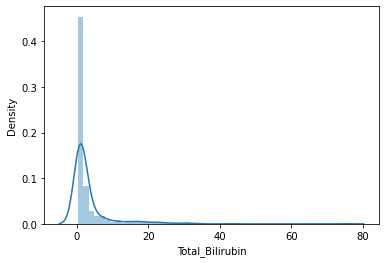

In [15]:
#  Univariate Analysis
sb.distplot(data["Total_Bilirubin"])

<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Count'>

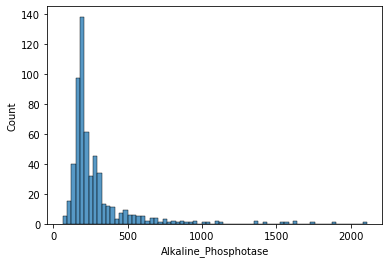

In [16]:
sb.histplot(data["Alkaline_Phosphotase"])

# Bivariate Analysis

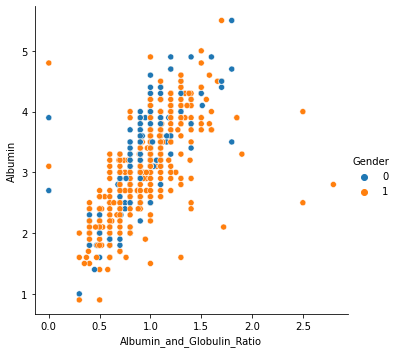

In [17]:
sb.relplot(x="Albumin_and_Globulin_Ratio",y="Albumin",data=data,hue="Gender")

# Multi - Variate Analysis

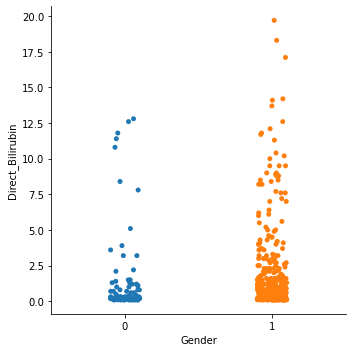

In [18]:
sb.catplot(x="Gender",y="Direct_Bilirubin",data=data)

# Splitting The Dataset Into Dependent And Independent Variable

In [19]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [20]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

# Split The Dependent And Independent Features Into Train Set And Test Set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [23]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(524, 10)
(524,)
(59, 10)
(59,)


# Train And Test The Model Using Classification Algorithms

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
svm = SVC()
RFmodel = RandomForestClassifier()
KNN = KNeighborsClassifier()

### Support Vector Machine Model

In [26]:
svm.fit(X_train,Y_train)

SVC()

### Random Forest 

In [27]:
RFmodel.fit(X_train,Y_train)

RandomForestClassifier()

### KNN Model

In [28]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

# Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

### Support Vector Machine Model

In [30]:
svm_pred = svm.predict(X_test)

In [31]:
svm_accuracy = accuracy_score(svm_pred,Y_test)

In [32]:
print("SVM Accuracy:",svm_accuracy)

SVM Accuracy: 0.7627118644067796


In [33]:
print("SVM Precision score:",precision_score(svm_pred,Y_test))

SVM Precision score: 1.0


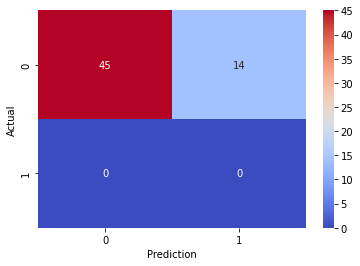

In [34]:
cf=confusion_matrix(svm_pred,Y_test)
sb.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

### Random Forest 

In [35]:
RFmodel_pred = RFmodel.predict(X_test)

In [36]:
RFmodel_accuracy = accuracy_score(RFmodel_pred,Y_test)

In [37]:
print("RF Accuracy:",RFmodel_accuracy)

RF Accuracy: 0.8135593220338984


In [38]:
print("RF Precision score:",precision_score(RFmodel_pred,Y_test))

RF Precision score: 0.9111111111111111


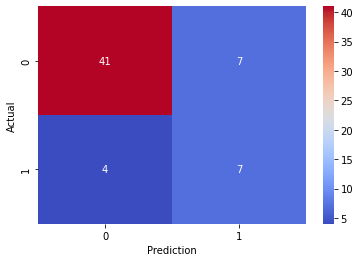

In [39]:
cf=confusion_matrix(RFmodel_pred,Y_test)
sb.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

### KNN Model

In [40]:
KNN_pred = KNN.predict(X_test)

In [41]:
KNN_accuracy = accuracy_score(KNN_pred,Y_test)

In [42]:
print("KNN Accuracy:",KNN_accuracy)

KNN Accuracy: 0.7457627118644068


In [43]:
print("KNN Precision score:",precision_score(KNN_pred,Y_test))

KNN Precision score: 0.8222222222222222


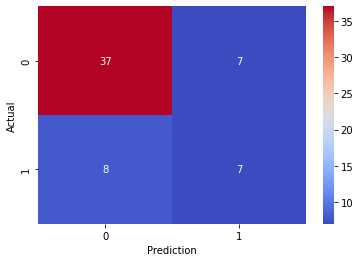

In [44]:
cf=confusion_matrix(KNN_pred,Y_test)
sb.heatmap(cf,cmap='coolwarm',annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Save The Model

In [45]:
!pip install -U ibm_watson_machine_learning

In [46]:
from ibm_watson_machine_learning import APIClient

In [47]:
wml_credential={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"qE7RzJiXiSjsqvpB7QIK0tDhwAuCqCj79qRL7OZTKO53"
}
client = Wml_client=APIClient(wml_credential)

In [48]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [57]:
space_uid = guid_from_space_name(client, 'Model')
print("Space UID = "+space_uid)

Space UID = 565ee5ac-92cf-43b6-9587-f6762df049a4


In [58]:
Wml_client.set.default_space(space_uid)

'SUCCESS'

In [59]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [60]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [61]:
model_details=client.repository.store_model(model=RFmodel,meta_props={
    client.repository.ModelMetaNames.NAME:"Liver",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid })

model_id=client.repository.get_model_id(model_details)

In [62]:
model_id

'82309fc5-400a-427b-90aa-eb358524bc0a'